# Source :  
These dataset, I captured it from https://bodysize.date by webscraping method and label by using Body Type Calculator from https://goodcalculators.com/body-shape-calculator/

# Data Set Information :
These data are the result of a women body types.
There are 6 columns information.  
 1. URL 
 2. Img_URL  
 3. Bust  
 4. Waist  
 5. Hip  
 6. Label (a women shape types)

Therefore, I will use 3 features which are Bust,Waist and Hip to classify the label or women shape types.


# Import important library

In [236]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1 LOAD DATASET

In [237]:
df = pd.read_csv('womenbodyshape.csv')
df.sample(5)

,URL,Img_URL,Bust,Waist,Hip,label
225,https://bodysize.date/meghan-markle/,https://bodysize.date/wp-content/uploads/2020/...,37.0,25.0,34.0,Hourglass
269,https://bodysize.date/maya-kazan/,https://bodysize.date/wp-content/uploads/2020/...,34.0,25.0,34.0,Inverted triangle
648,https://bodysize.date/katherine-heigl/,https://bodysize.date/wp-content/uploads/2020/...,36.0,25.0,36.0,Inverted triangle
292,https://bodysize.date/amber-montana/,https://bodysize.date/wp-content/uploads/2020/...,34.0,25.0,34.0,Inverted triangle
237,https://bodysize.date/jessy-mendiola/,https://bodysize.date/wp-content/uploads/2020/...,34.0,25.0,34.0,Inverted triangle


In [238]:
#select data only relevant feature and label which can be use for modeling.
dataset = df[["Bust","Waist","Hip","label"]]
dataset.head(3)

,Bust,Waist,Hip,label
0,33.0,25.0,34.0,Rectangle
1,34.0,25.0,33.0,Hourglass
2,36.0,25.0,35.0,Hourglass


# 2.Summarize the Dataset

In [239]:
print(dataset.shape) #dataset contain 652 rows and 4 columns

(652, 4)


# 3.Statistical Summary

In [240]:
print(dataset.describe())

Bust       Waist         Hip
count  652.000000  652.000000  652.000000
mean    34.671012   25.163344   34.795721
std      2.047321    1.971515    2.195893
min     28.000000   20.000000   28.000000
25%     34.000000   24.000000   34.000000
50%     34.000000   25.000000   34.000000
75%     36.000000   26.000000   35.000000
max     52.000000   49.000000   59.000000


## Class Distribution
See the distribution or total in each class label in the dataset.

In [241]:
print(dataset.groupby('label').size())

label
Hourglass            204
Inverted triangle    242
Pear or triangle      50
Rectangle            156
dtype: int64


In [242]:
dataset.info() #no mising data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bust    652 non-null    float64
 1   Waist   652 non-null    float64
 2   Hip     652 non-null    float64
 3   label   652 non-null    object 
dtypes: float64(3), object(1)
memory usage: 20.5+ KB


# 4. Data Visualization  
- Univariate plots to better understand each attribute.  
- Multivariate plots to better understand the relationships between attributes.

## Univariate

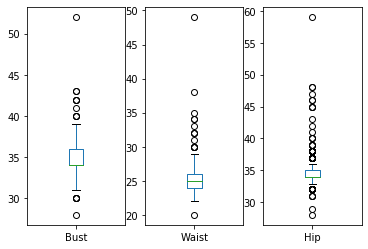

In [243]:
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

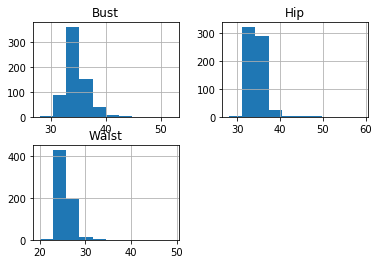

In [244]:
dataset.hist()
plt.show()

## Multivariate 

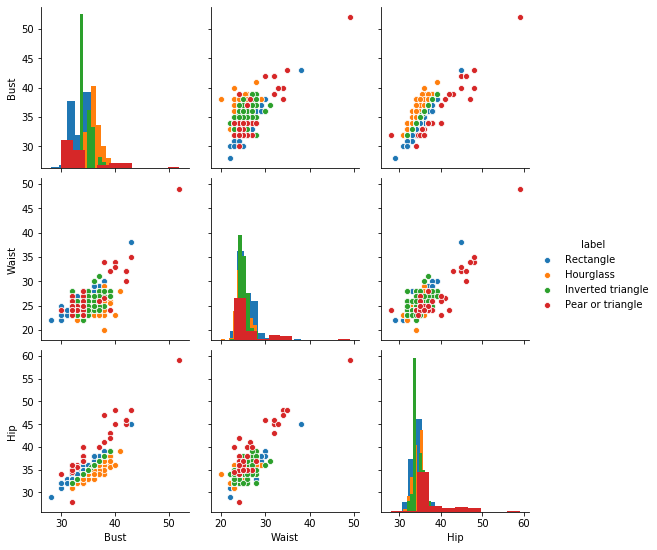

In [245]:
sns.pairplot(dataset,hue='label',diag_kind='hist')
plt.show()

# 5. Data Preparation before modeling
 - Label encoder to change categorical data to numerical data for label.
 - Normalization to make same scale.

## 5.1 Label Encoder

In [246]:
le = LabelEncoder()
dataset['label_encode'] = le.fit_transform(dataset['label'])
dataset.head(3)

,Bust,Waist,Hip,label,label_encode
0,33.0,25.0,34.0,Rectangle,3
1,34.0,25.0,33.0,Hourglass,0
2,36.0,25.0,35.0,Hourglass,0


In [247]:
#crosstab check which nuber mapped the label
# 0 = "Hourglass"
# 1 = "Inverted triangle"
# 2 = "Pear or triangle"
# 3 = "Rectangle"
pd.crosstab(dataset['label_encode'], dataset['label'])

label,Hourglass,Inverted triangle,Pear or triangle,Rectangle
label_encode,,,,
0,204,0,0,0
1,0,242,0,0
2,0,0,50,0
3,0,0,0,156


## 5.2 Standard nomalization

In [248]:
dataset[["Bust","Waist","Hip"]] = pd.DataFrame(StandardScaler().fit_transform(dataset[["Bust","Waist","Hip"]]))
dataset.sample(5)

,Bust,Waist,Hip,label,label_encode
384,0.649633,-0.082915,0.093099,Hourglass,0
608,0.649633,1.947539,1.460335,Rectangle,3
346,0.160815,-0.590529,-0.362646,Hourglass,0
371,0.160815,1.439925,0.548844,Rectangle,3
356,0.160815,-0.590529,-0.362646,Hourglass,0


# 6. Evaluate Some Algorithms
- Separate out a validation dataset.
- Set-up the test harness to use 10-fold cross validation.
- Build 5 different models to predict type of women shapes
- Select the best model.

## 6.1 Create a Validation Dataset

- Create training data in the X_train and Y_train for preparing models   
- Create X_validation and Y_validation sets that we can use later.

In [249]:
X = dataset[["Bust","Waist","Hip"]]
Y = dataset[["label_encode"]]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## 5.2 Test Harness  
The earlier data that we splited our dataset we will use 10-fold cross validation to estmate  accuracy into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [250]:
seed = 7 
scoring = 'accuracy'


We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 6.3 Build Models
Let’s evaluate 6 different algorithms:

- Logistic Regression (LR)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

In [251]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.963498 (0.023501)
KNN: 0.921408 (0.046374)
CART: 0.978882 (0.018146)
NB: 0.554717 (0.076697)
SVM: 0.988462 (0.015385)


#### See the above accuracy mean result of models is Classification and Regression Trees (CART). 
Compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

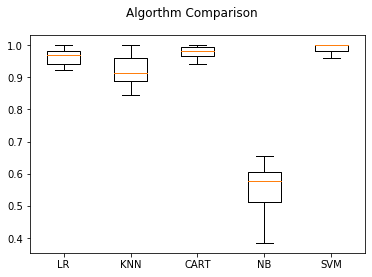

In [252]:
# Compare Algos
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 7. Make Predictions
Using Classification and Regression Trees (CART) due to cross-validatation accuracy result as the above is Classification and Regression Trees (CART)..


## 7.1 Train/Test split

In [253]:
test_size = 0.3
print(X.shape)
print(Y.shape)

(652, 3)
(652, 1)


In [254]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed )

In [255]:
print(X_train.shape)
print(X_test.shape)

(456, 3)
(196, 3)


## 7.2 Using Classification and Regression Trees (CART).

In [256]:
dtree = DecisionTreeClassifier(random_state=seed)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [257]:
y_predict = dtree.predict(X_test)
print(y_predict)

[3 3 3 0 1 1 3 0 1 0 2 1 0 3 3 1 1 0 1 0 1 3 3 1 1 0 1 3 3 2 0 3 0 1 1 0 1
 2 3 0 1 0 1 0 0 1 1 0 2 3 0 0 0 1 1 1 1 0 1 0 1 3 0 0 1 0 2 0 1 1 3 1 3 2
 2 3 1 3 1 0 1 3 2 0 1 0 0 0 1 0 0 1 0 2 3 3 1 1 1 3 3 3 2 1 3 0 1 3 1 0 1
 3 0 3 3 1 0 3 3 3 0 0 0 1 0 0 1 1 3 3 2 0 0 1 1 1 0 3 1 1 1 1 0 3 0 1 3 3
 0 0 1 0 1 0 3 1 3 0 0 0 3 0 3 3 0 3 1 0 0 3 3 0 2 1 0 1 1 1 2 3 0 0 1 0 1
 1 1 0 1 1 1 3 3 0 0 1]


In [258]:
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.9642857142857143
[[63  2  0  0]
 [ 2 66  0  1]
 [ 0  1 12  0]
 [ 0  0  1 48]]


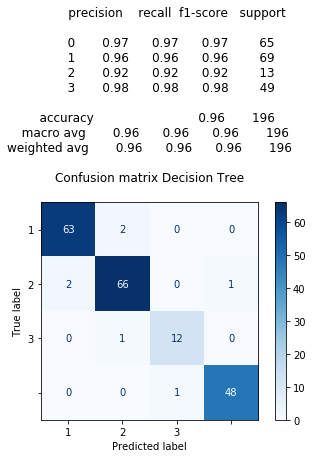

In [259]:
# Anothor option to visulize the matrix
disp = plot_confusion_matrix(dtree, X_test, y_test,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title(classification_report(y_test,y_predict)+"\nConfusion matrix Decision Tree\n")
plt.savefig('dtree.png',bbox_inches="tight")
plt.show()

# As the accuracy score of Classification and Regression Tree model in cross-validation we will use this model to actual production.

# 7. Apply model to recommend women who you should wear like them

## 7.1 Input new data

In [260]:
# define input
new_input = [[34, 24,35]]

## 7.2 Predict new data

In [261]:
#get prediction for new input
new_output = dtree.predict(new_input)

In [262]:
# 0 = "Hourglass"
# 1 = "Inverted triangle"
# 2 = "Pear or triangle"
# 3 = "Rectangle"
output = { 0 : "Hourglass",
 1 : "Inverted triangle",
 2 : "Pear or triangle",
 3 : "Rectangle"}

predict_output = output[int(new_output)]
print(predict_output)

Pear or triangle


## 7.3 Visualize the recommendation who you should ware like them.

In [263]:
from IPython.display import HTML

In [264]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [265]:
df['Img_URL']=df.apply(lambda r: to_html_img(r['Img_URL'], 100), axis=1)
df.head()

,URL,Img_URL,Bust,Waist,Hip,label
0,https://bodysize.date/tina-ahuja/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",33.0,25.0,34.0,Rectangle
1,https://bodysize.date/alison-lohman/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,25.0,33.0,Hourglass
2,https://bodysize.date/zoe-mclellan/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",36.0,25.0,35.0,Hourglass
3,https://bodysize.date/demi-moore/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,24.0,33.0,Hourglass
4,https://bodysize.date/jessica-alba/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,24.0,34.0,Inverted triangle


In [266]:
boo = dataset['label'] == predict_output


In [267]:
#Sample 10 persons you should ware dress like her.
HTML(df[boo].sample(10).to_html(escape=False))

,URL,Img_URL,Bust,Waist,Hip,label
357,https://bodysize.date/angela-bassett/,,34.0,25.0,37.0,Pear or triangle
201,https://bodysize.date/cynthia-nixon/,,32.0,24.0,35.0,Pear or triangle
438,https://bodysize.date/anna-jagodzinska/,,33.0,24.0,35.5,Pear or triangle
137,https://bodysize.date/sommer-ray/,,34.0,24.0,38.0,Pear or triangle
143,https://bodysize.date/denise-bidot/,,42.0,32.0,45.0,Pear or triangle
323,https://bodysize.date/megan-rain/,,32.0,27.0,35.0,Pear or triangle
452,https://bodysize.date/antonia-thomas/,,33.0,24.0,35.5,Pear or triangle
528,https://bodysize.date/christina-mendez/,,42.0,32.0,46.0,Pear or triangle
651,https://bodysize.date/lily-jordan/,,32.0,24.0,28.0,Pear or triangle
394,https://bodysize.date/lena-paul/,,32.0,25.0,36.0,Pear or triangle


# As the result of reccomendation who you should ware dress like her, I sample the data which predicted just 10 women as the above. Using decision tree (cart) model